In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MilanvictorV/MyDataScienceProjects/main/ML_Models/Heart_Disease/framingham_heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns = df.columns.str.lower()
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4238, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentsmoker    4238 non-null   int64  
 4   cigsperday       4209 non-null   float64
 5   bpmeds           4185 non-null   float64
 6   prevalentstroke  4238 non-null   int64  
 7   prevalenthyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totchol          4188 non-null   float64
 10  sysbp            4238 non-null   float64
 11  diabp            4238 non-null   float64
 12  bmi              4219 non-null   float64
 13  heartrate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  tenyearchd       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.isna().sum()

male                 0
age                  0
education          105
currentsmoker        0
cigsperday          29
bpmeds              53
prevalentstroke      0
prevalenthyp         0
diabetes             0
totchol             50
sysbp                0
diabp                0
bmi                 19
heartrate            1
glucose            388
tenyearchd           0
dtype: int64

In [8]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df['education'] = df['education'].fillna(df['education'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
df['cigsperday'] = df['cigsperday'].fillna(df['cigsperday'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df.dropna(subset = 'bpmeds', inplace = True)
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df['totchol'] = df['totchol'].fillna(df['totchol'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df['heartrate'] = df['heartrate'].fillna(df['heartrate'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
df.isna().sum()

male               0
age                0
education          0
currentsmoker      0
cigsperday         0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
totchol            0
sysbp              0
diabp              0
bmi                0
heartrate          0
glucose            0
tenyearchd         0
dtype: int64

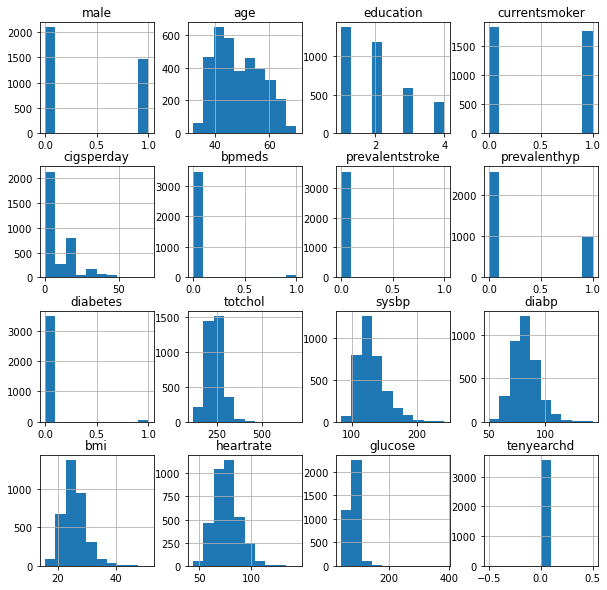

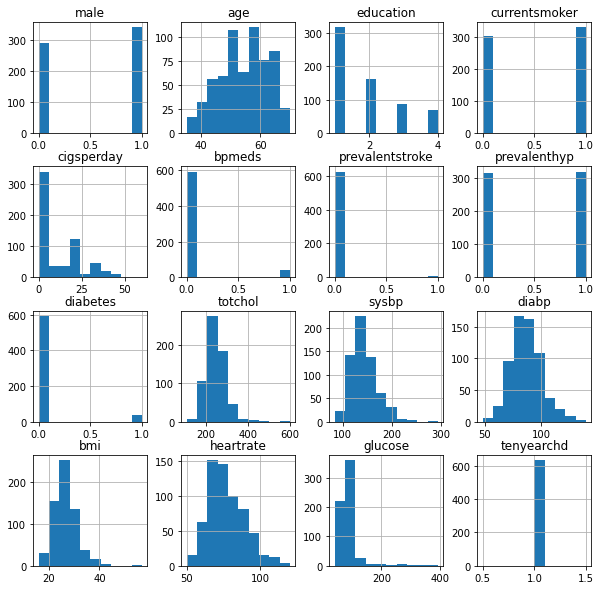

In [17]:
df.groupby('tenyearchd').hist(figsize = (10,10))

plt.show()

In [18]:
x = df.iloc[: , 0 : -1].values
y = df.iloc[: , -1].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3)

In [20]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [21]:
obj = StandardScaler()

In [22]:
x_train = obj.fit_transform(x_train)
x_test = obj.fit_transform(x_test)

In [23]:
classifier = LogisticRegression(random_state = 0)

In [24]:
classifier.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [25]:
classifier.score(x_test, y_test)

0.8606687898089171

In [26]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[1065    2]
 [ 173   16]]


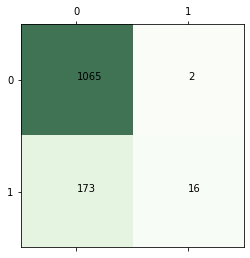

In [28]:
plt.matshow(cm  , cmap = 'Greens' , alpha = 0.75)

for  i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = cm[i,j])
        
plt.show()

In [29]:
print(accuracy_score(y_test, y_pred))

0.8606687898089171
